# Aryan Rajoria E19CSE319
## Lab 7

In [ ]:
#!unzip "./Buildings.zip"

Archive:  ./Buildings.zip
   creating: Edge Detection/
  inflating: Edge Detection/building.jpg  
  inflating: Edge Detection/csbldg.jpg  
  inflating: Edge Detection/gates.png  
  inflating: Edge Detection/House.jpg  


In [ ]:
#!unzip "./license plates.zip"

Archive:  ./license plates.zip
   creating: small sample/
  inflating: small sample/10.JPG     
  inflating: small sample/13.JPG     
  inflating: small sample/14.JPG     
  inflating: small sample/41.JPG     
  inflating: small sample/42.JPG     
  inflating: small sample/69.JPG     
  inflating: small sample/84with angle.JPG  
  inflating: small sample/89.JPG     
  inflating: small sample/HPIM0799.JPG  
  inflating: small sample/HPIM0809.JPG  
  inflating: small sample/HPIM0991.JPG  
  inflating: small sample/HPIM1006.JPG  
  inflating: small sample/HPIM1098.JPG  
  inflating: small sample/HPIM1135.JPG  
  inflating: small sample/HPIM1172.JPG  
  inflating: small sample/HPIM1185.JPG  
  inflating: small sample/HPIM1221.JPG  
  inflating: small sample/HPIM1239.JPG  
  inflating: small sample/HPIM1240.JPG  
  inflating: small sample/HPIM1252.JPG  
  inflating: small sample/HPIM1271.JPG  
  inflating: small sample/IMG_0460.jpg  
  inflating: small sample/IMG_0461.jpg  
  inflating: sma

In [ ]:
!sudo apt update

Get:1 http://security.debian.org/debian-security buster/updates InRelease [65.4 kB]
Get:2 http://deb.debian.org/debian buster InRelease [122 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [51.9 kB]
Get:4 http://security.debian.org/debian-security buster/updates/main amd64 Packages [305 kB]
Get:5 http://deb.debian.org/debian buster/main amd64 Packages [7,907 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [15.2 kB]
Fetched 8,466 kB in 2s (5,191 kB/s)



11 packages can be upgraded. Run 'apt list --upgradable' to see them.


In [ ]:
!sudo apt install libgl1-mesa-glx -y




The following additional packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libglapi-mesa libglvnd0 libglx-mesa0 libglx0
  libllvm7 libpciaccess0 libsensors-config libsensors5 libx11-xcb1
  libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0 libxcb-sync1
  libxshmfence1 libxxf86vm1
Suggested packages:
  pciutils lm-sensors
The following NEW packages will be installed:
  libdrm-amdgpu1 libdrm-common libdrm-intel1 libdrm-nouveau2 libdrm-radeon1
  libdrm2 libgl1 libgl1-mesa-dri libgl1-mesa-glx libglapi-mesa libglvnd0
  libglx-mesa0 libglx0 libllvm7 libpciaccess0 libsensors-config libsensors5
  libx11-xcb1 libxcb-dri2-0 libxcb-dri3-0 libxcb-glx0 libxcb-present0
  libxcb-sync1 libxshmfence1 libxxf86vm1
0 upgraded, 25 newly installed, 0 to remove and 11 not upgraded.
Need to get 21.3 MB of archives.
After this operation, 214 MB of additional disk space will be used.
Get:1 http://deb.debian.org/debian

In [ ]:
!pip install imutils
!pip install scikit-image

In [ ]:
from cv2 import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

In [ ]:
def imshow_plt(img):
    temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(temp)

In [ ]:
img = cv2.imread('./small sample/89.JPG')


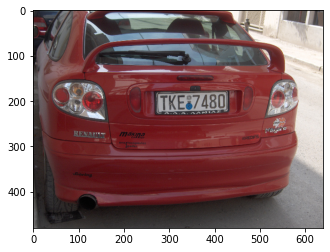

In [ ]:
imshow_plt(img)

# Edge detection

In [ ]:
# img = cv2.resize(img, (620,480) )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

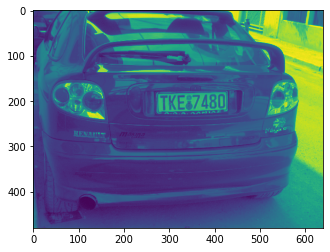

In [ ]:
plt.imshow(gray)

In [ ]:
gray = cv2.bilateralFilter(gray, 13, 15, 15)

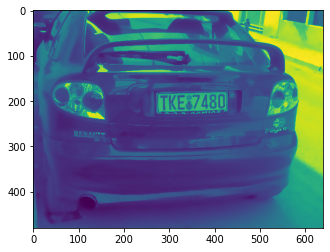

In [ ]:
plt.imshow(gray)

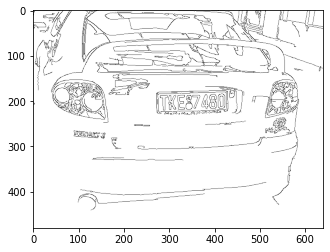

In [ ]:
edged = cv2.Canny(gray, 30, 200)
plt.imshow(edged, cmap='Greys')

In [ ]:
# carplate_haar_cascade = cv2.CascadeClassifier('./haar_cascades/haarcascade_russian_plate_number.xml')

In [ ]:
rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)

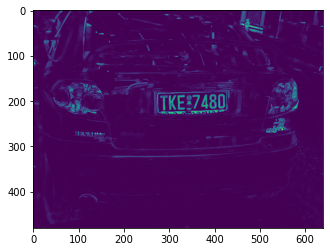

In [ ]:
plt.imshow(blackhat)

In [ ]:
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
light = cv2.threshold(light, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

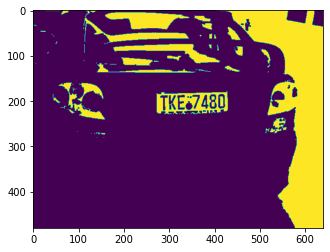

In [ ]:
plt.imshow(light)

In [ ]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
			dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
gradX = gradX.astype("uint8")

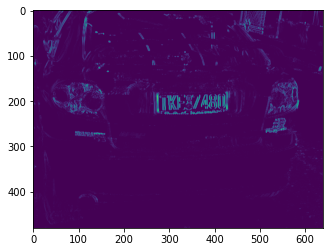

In [ ]:
plt.imshow(gradX)

In [ ]:
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

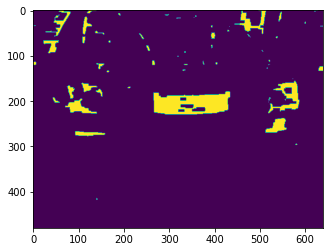

In [ ]:
plt.imshow(thresh)

In [ ]:
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

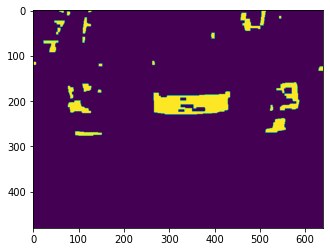

In [ ]:
plt.imshow(thresh)

In [ ]:
thresh = cv2.bitwise_and(thresh, thresh, mask=light)
thresh = cv2.dilate(thresh, None, iterations=2)
thresh = cv2.erode(thresh, None, iterations=1)

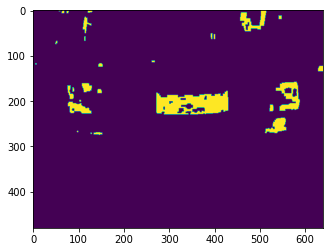

In [ ]:
plt.imshow(thresh)

In [ ]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
print(cnts[0])

[[[426 178]]

 [[426 179]]

 [[425 180]]

 [[423 180]]

 [[423 183]]

 [[422 184]]

 [[419 184]]

 [[419 188]]

 [[418 189]]

 [[414 189]]

 [[413 188]]

 [[413 184]]

 [[409 184]]

 [[408 185]]

 [[401 185]]

 [[401 188]]

 [[400 189]]

 [[394 189]]

 [[393 188]]

 [[393 185]]

 [[378 185]]

 [[377 186]]

 [[367 186]]

 [[367 189]]

 [[366 190]]

 [[353 190]]

 [[352 189]]

 [[352 187]]

 [[334 187]]

 [[334 190]]

 [[333 191]]

 [[323 191]]

 [[322 192]]

 [[320 192]]

 [[319 191]]

 [[319 187]]

 [[296 187]]

 [[296 191]]

 [[295 192]]

 [[282 192]]

 [[281 191]]

 [[281 188]]

 [[279 188]]

 [[278 187]]

 [[278 184]]

 [[276 184]]

 [[274 182]]

 [[272 182]]

 [[272 225]]

 [[274 227]]

 [[283 227]]

 [[283 225]]

 [[285 223]]

 [[289 223]]

 [[290 224]]

 [[290 226]]

 [[289 227]]

 [[289 229]]

 [[342 229]]

 [[342 227]]

 [[337 227]]

 [[336 226]]

 [[336 224]]

 [[337 223]]

 [[339 223]]

 [[340 222]]

 [[348 222]]

 [[349 223]]

 [[349 225]]

 [[347 227]]

 [[347 229]]

 [[363

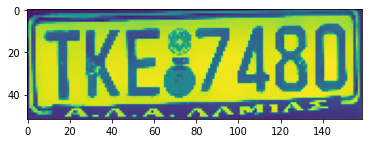

In [ ]:
from skimage.segmentation import clear_border
lpCnt = None
roi = None
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    ar = w / float(h)
    if ar >= 2 and ar <= 6:
        lpCnt = c
        licensePlate = gray[y:y + h, x:x + w]
        roi = cv2.threshold(licensePlate, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        # if clearBorder:
        #     roi = clear_border(roi)
        plt.imshow(licensePlate)
        break

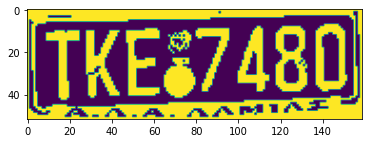

In [ ]:
plt.imshow(roi)

In [ ]:
lpCnt

array([[[426, 178]],

       [[426, 179]],

       [[425, 180]],

       [[423, 180]],

       [[423, 183]],

       [[422, 184]],

       [[419, 184]],

       [[419, 188]],

       [[418, 189]],

       [[414, 189]],

       [[413, 188]],

       [[413, 184]],

       [[409, 184]],

       [[408, 185]],

       [[401, 185]],

       [[401, 188]],

       [[400, 189]],

       [[394, 189]],

       [[393, 188]],

       [[393, 185]],

       [[378, 185]],

       [[377, 186]],

       [[367, 186]],

       [[367, 189]],

       [[366, 190]],

       [[353, 190]],

       [[352, 189]],

       [[352, 187]],

       [[334, 187]],

       [[334, 190]],

       [[333, 191]],

       [[323, 191]],

       [[322, 192]],

       [[320, 192]],

       [[319, 191]],

       [[319, 187]],

       [[296, 187]],

       [[296, 191]],

       [[295, 192]],

       [[282, 192]],

       [[281, 191]],

       [[281, 188]],

       [[279, 188]],

       [[278, 187]],

       [[278, 184]],

       [[2

In [ ]:
(x, y, w, h) = cv2.boundingRect(c)
cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)

array([[[103,  98,  99],
        [ 97,  95,  95],
        [ 90,  91,  89],
        ...,
        [ 90,  99, 103],
        [ 82,  92,  99],
        [ 83,  95, 101]],

       [[ 95,  93,  93],
        [ 97,  95,  95],
        [ 93,  94,  92],
        ...,
        [104, 100, 106],
        [ 98,  94, 100],
        [ 98,  94, 100]],

       [[ 93,  91,  90],
        [ 94,  92,  91],
        [ 87,  87,  87],
        ...,
        [111, 110, 114],
        [110, 109, 113],
        [111, 110, 114]],

       ...,

       [[119, 121, 122],
        [109, 108, 110],
        [114, 113, 115],
        ...,
        [141, 140, 142],
        [141, 138, 140],
        [139, 136, 138]],

       [[115, 117, 118],
        [111, 110, 112],
        [113, 112, 114],
        ...,
        [116, 115, 117],
        [132, 129, 131],
        [137, 134, 136]],

       [[115, 117, 118],
        [113, 112, 114],
        [110, 109, 111],
        ...,
        [132, 131, 133],
        [135, 132, 134],
        [139, 136, 138]]

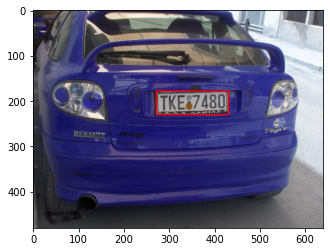

In [ ]:
plt.imshow(img)

In [ ]:
import os
# list_names=['./small sample/10.JPG']
list_names=[]
for i in os.listdir('./small sample/'):
    list_names.append('./small sample/' + i)
# list_names = sorted(list_names)
list_names

['./small sample/HPIM1271.JPG',
 './small sample/HPIM1185.JPG',
 './small sample/69.JPG',
 './small sample/IMG_0460.jpg',
 './small sample/HPIM1252.JPG',
 './small sample/13.JPG',
 './small sample/14.JPG',
 './small sample/HPIM1239.JPG',
 './small sample/42.JPG',
 './small sample/IMG_0466.jpg',
 './small sample/HPIM1221.JPG',
 './small sample/IMG_0461.jpg',
 './small sample/HPIM1172.JPG',
 './small sample/41.JPG',
 './small sample/HPIM1135.JPG',
 './small sample/IMG_0465.jpg',
 './small sample/10.JPG',
 './small sample/HPIM1098.JPG',
 './small sample/IMG_0464.jpg',
 './small sample/IMG_0463.jpg',
 './small sample/HPIM0991.JPG',
 './small sample/HPIM0799.JPG',
 './small sample/89.JPG',
 './small sample/84with angle.JPG',
 './small sample/HPIM0809.JPG',
 './small sample/HPIM1240.JPG',
 './small sample/HPIM1006.JPG']

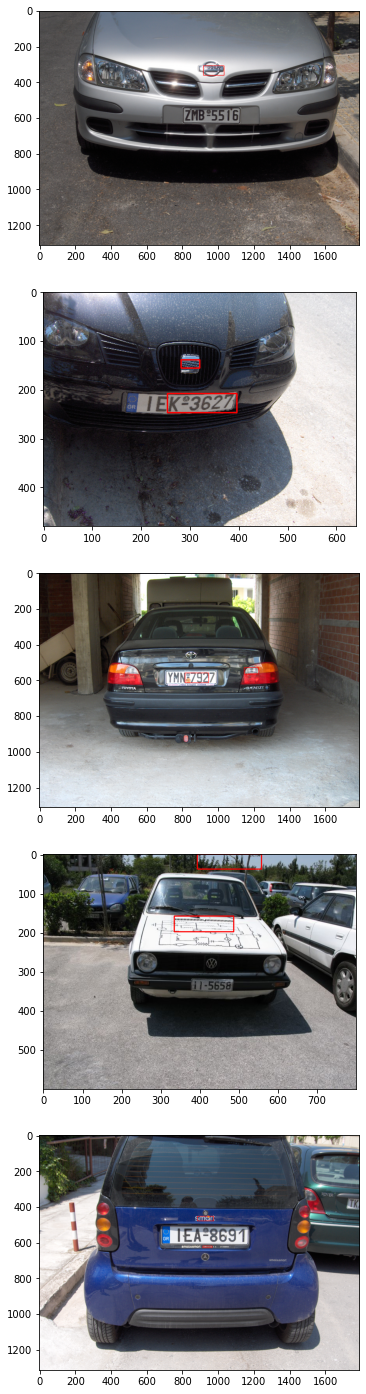

In [ ]:
no_of_image = 5

row = 1
col = no_of_image
sub_no = 1
fig = plt.figure(figsize=(8, col*no_of_image))


for image_name in list_names[:no_of_image]:
    img = cv2.imread(image_name)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.bilateralFilter(gray, 13, 15, 15)
    edged = cv2.Canny(gray, 30, 200)
    rectKern = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKern)
    squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    light = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, squareKern)
    light = cv2.threshold(light, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F,
                dx=1, dy=0, ksize=-1)
    gradX = np.absolute(gradX)
    (minVal, maxVal) = (np.min(gradX), np.max(gradX))
    gradX = 255 * ((gradX - minVal) / (maxVal - minVal))
    gradX = gradX.astype("uint8")
    gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
    gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, rectKern)
    thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    thresh = cv2.bitwise_and(thresh, thresh, mask=light)
    thresh = cv2.dilate(thresh, None, iterations=2)
    thresh = cv2.erode(thresh, None, iterations=1)
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]
    lpCnt = None
    roi = None
    Upto_three = 0
    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)
        if ar >= 2 and ar <= 6:
            lpCnt = c
            licensePlate = gray[y:y + h, x:x + w]
            roi = cv2.threshold(licensePlate, 0, 255,
                cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            # if clearBorder:
            #     roi = clear_border(roi)
            #plt.imshow(licensePlate)
            Upto_three+=1
            if Upto_three==3:
                break
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(img, (x,y), (x+w, y+h), (0, 0, 255), 2)

    fig.add_subplot(col, row, sub_no)
    sub_no+=1
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8a021122-34da-482c-a2ea-1b10266af18e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>